# Exploring Disney Land Wait Time Data Set 

In [114]:
import pandas as pd ## call pandas functions using "pd"
import numpy as np  ## call numpy functions using "np"
import matplotlib.pyplot as plt
import seaborn as sns

#import meta data
meta = pd.read_csv("disney.csv")

#import magic kingdom rides (wait times)
splash = pd.read_csv("splash_mountain.csv")
seven_dwarfs = pd.read_csv("7_dwarfs_train.csv")
pirates = pd.read_csv('pirates_of_caribbean.csv')

In [115]:
# Dropping sactmin from magic world rides, then dropping NaN from spostmin

# Drop rows where wait time is not available (-999)
pirates = pirates[pirates.SPOSTMIN > 0]
seven_dwarfs = seven_dwarfs[seven_dwarfs.SPOSTMIN > 0]
splash = splash[splash.SPOSTMIN > 0]

# Dwarf Ride Analysis

In [116]:
meta_dwarf = pd.merge(seven_dwarfs, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [117]:
meta_dwarf = meta_dwarf.fillna(0)
meta_dwarf['date'] = pd.to_datetime(meta_dwarf['date'])
##Drop date before ride opening on  May 28th 2014
meta_dwarf =  meta_dwarf[meta_dwarf.date >= "2014-5-28"]
meta_dwarf.head(n = 3)

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
379,2014-05-28,2014-05-28 09:10:00,90.0,0.0,0,4,147,21,5,2014,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
380,2014-05-28,2014-05-28 09:18:00,120.0,0.0,0,4,147,21,5,2014,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
381,2014-05-28,2014-05-28 09:24:00,180.0,0.0,0,4,147,21,5,2014,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0


In [118]:
avg_wait = meta_dwarf.groupby('date')['SPOSTMIN'].mean()
avg_wait.head(n = 10)

date
2014-05-28     83.371212
2014-05-29     85.463918
2014-05-30     81.181818
2014-05-31    107.908163
2014-06-01     93.421053
2014-06-02     96.478261
2014-06-03     78.769841
2014-06-04     92.634409
2014-06-05     68.785714
2014-06-06     91.028037
Name: SPOSTMIN, dtype: float64

In [119]:
#sum all posted wait times by day
sum_by_day = meta_dwarf.groupby('date')['SPOSTMIN'].sum()
#reset index to create dataframe columns
sum_by_day = sum_by_day.reset_index()
sum_by_day = pd.DataFrame(sum_by_day,columns=['date','SPOSTMIN'])

In [120]:
#format the date in the correct way to be manipulated
sum_by_day['date'] = pd.to_datetime(sum_by_day['date'])

In [121]:
#compute weighted average of posted wait times by day
avg = meta_dwarf.groupby('date')['SPOSTMIN'].mean()
#reset index to create dataframe columns
avg = avg.reset_index()
#name columns of df
avg = pd.DataFrame(avg,columns=['date','SPOSTMIN'])
avg.head()

,date,SPOSTMIN
0,2014-05-28,83.371212
1,2014-05-29,85.463918
2,2014-05-30,81.181818
3,2014-05-31,107.908163
4,2014-06-01,93.421053


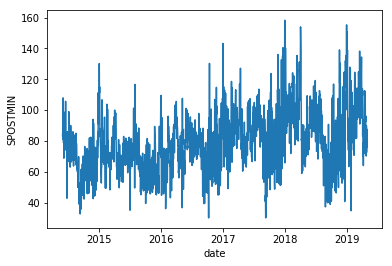

In [122]:
ax = sns.lineplot(x = avg.date, y = avg.SPOSTMIN )


In [123]:
meta['DATE'] = pd.to_datetime(meta['DATE'])
#merge back with original meta set for daily weighted averages
meta_dwarf2 = pd.merge(avg, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [124]:
#fill na for new meta splash data
meta_dwarf2 = meta_dwarf2.fillna(0)
meta_dwarf2.head(n = 3)

,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2014-05-28,83.371212,0,4,147,21,5,2014,SPRING,3,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
1,2014-05-29,85.463918,0,5,148,21,5,2014,SPRING,4,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
2,2014-05-30,81.181818,0,6,149,21,5,2014,SPRING,5,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0


#### Week of the Year

In [125]:
week_avg = meta_dwarf2.groupby("WEEKOFYEAR")["SPOSTMIN"].mean()
week_avg = week_avg.reset_index()
week_avg = pd.DataFrame(week_avg,columns=['WEEKOFYEAR','SPOSTMIN'])

[Text(0, 0.5, 'Average Attendance by Minute'),
 Text(0.5, 0, 'Week of the Year')]

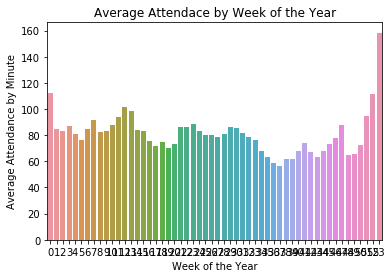

In [126]:
ax = sns.barplot(x = "WEEKOFYEAR", y = "SPOSTMIN", data = week_avg)
ax.set_title("Average Attendace by Week of the Year")
ax.set(xlabel='Week of the Year', ylabel='Average Attendance by Minute')

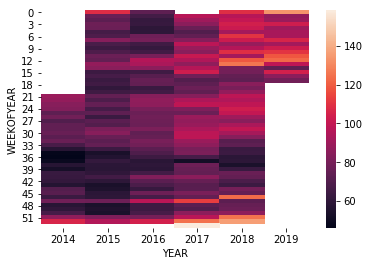

In [127]:
# Grouping by week and year

#aggregate by month
week_dwarf2 = meta_dwarf2.groupby(['WEEKOFYEAR', 'YEAR'])['SPOSTMIN'].mean().reset_index()

week_dwarf2 = week_dwarf2.pivot("WEEKOFYEAR", "YEAR", "SPOSTMIN")
ax = sns.heatmap(week_dwarf2)

#### Wait Time vs Temperature

[Text(0, 0.5, 'Average Attendance by Minute'), Text(0.5, 0, 'Temperature')]

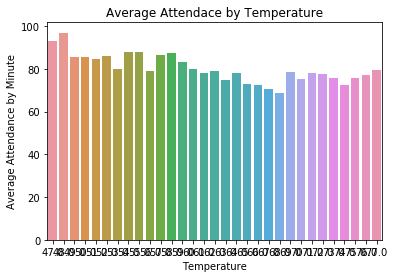

In [128]:
meta_dwarf2.WDWMINTEMP_mean = meta_dwarf2.WDWMINTEMP_mean.round()
avg_temp = meta_dwarf2.groupby("WDWMINTEMP_mean")["SPOSTMIN"].mean()
avg_temp = avg_temp.reset_index()
avg_temp = pd.DataFrame(avg_temp,columns=['WDWMINTEMP_mean','SPOSTMIN'])


ax = sns.barplot(x = "WDWMINTEMP_mean", y = "SPOSTMIN", data = avg_temp)
ax.set_title("Average Attendace by Temperature")
ax.set(xlabel='Temperature', ylabel='Average Attendance by Minute')

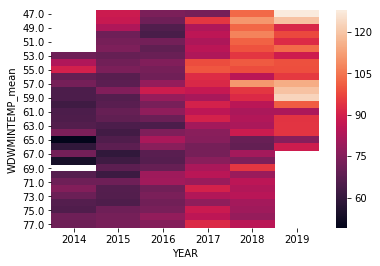

In [129]:
# Grouping by temperature and year

#aggregate by month
temp_dwarf2 = meta_dwarf2.groupby(['WDWMINTEMP_mean', 'YEAR'])['SPOSTMIN'].mean().reset_index()

temp_dwarf2 = temp_dwarf2.pivot("WDWMINTEMP_mean", "YEAR", "SPOSTMIN")
ax = sns.heatmap(temp_dwarf2)

#### Calculate park hours for the day and see if different park hours effect wait time

[Text(0, 0.5, 'Average Attendance by Minute'), Text(0.5, 0, 'Temperature')]

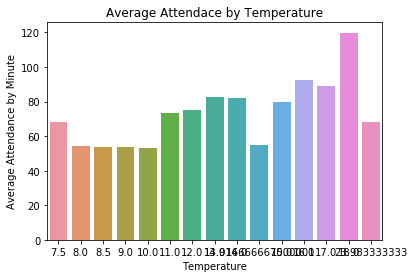

In [130]:
park_hour_df = meta_dwarf2[['SPOSTMIN','MKHOURS','MKOPEN','MKCLOSE','SEASON']]

park_hour_df = park_hour_df.groupby("MKHOURS")["SPOSTMIN"].mean()
park_hour_df = park_hour_df.reset_index()
park_hour_df.head(n=3)
#park_hour_df = pd.DataFrame(avg_temp,columns=['MKHOURS','SPOSTMIN','SEASON'])


ax = sns.barplot(x = "MKHOURS", y = "SPOSTMIN", data = park_hour_df)
ax.set_title("Average Attendace by Temperature")
ax.set(xlabel='Temperature', ylabel='Average Attendance by Minute')

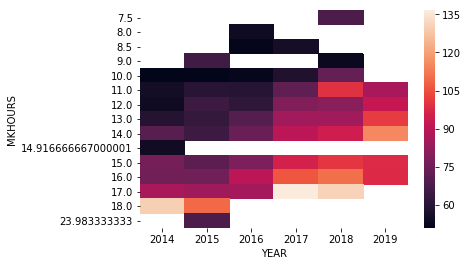

In [131]:
park_h_dwarf2 = meta_dwarf2.groupby(['MKHOURS', 'YEAR'])['SPOSTMIN'].mean().reset_index()

park_h_dwarf2 = park_h_dwarf2.pivot("MKHOURS", "YEAR", "SPOSTMIN")
ax = sns.heatmap(park_h_dwarf2)

# Splash Mountain Analysis

In [136]:
#Merging each ride with meta_data, using date as key
meta_splash = pd.merge(splash, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

ValueError: You are trying to merge on object and datetime64[ns] columns. If you wish to proceed you should use pd.concat

In [137]:
#change NAs to 0 values
meta_splash = meta_splash.fillna(0)
#format date in a way that can be worked with
meta_splash['date'] = pd.to_datetime(meta_splash['date'])
meta_splash.head()

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,2012-01-01 10:31:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
1,2012-01-01,2012-01-01 10:40:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
2,2012-01-01,2012-01-01 12:02:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
3,2012-01-01,2012-01-01 12:38:00,35.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
4,2012-01-01,2012-01-01 12:44:00,25.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0


In [ ]:
#avg of posted wait times by day in meta_splash
sum_by_day = meta_splash.groupby('date')['SPOSTMIN'].mean()
#reset index to create dataframe columns
sum_by_day = sum_by_day.reset_index()
sum_by_day = pd.DataFrame(sum_by_day,columns=['date','SPOSTMIN'])
sum_by_day.head()

In [ ]:
meta['DATE'] = pd.to_datetime(meta['DATE'])
#merge back with original meta set for daily weighted averages
meta_splash2 = pd.merge(sum_by_day, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

# change month and day to names of month and day ie: 1 to Sunday, 1 to January
meta_splash2['DAY'] = meta_splash2['date'].dt.weekday_name
meta_splash2['MONTH'] = meta_splash2['date'].dt.month_name()

meta_splash2.head()

In [ ]:
#fill na for new meta splash data
meta_splash2 = meta_splash2.fillna(0)
meta_splash2.head(100)

#### Wait time by Week 

In [82]:
week_avg = meta_splash2.groupby("WEEKOFYEAR")["SPOSTMIN"].mean()
week_avg = week_avg.reset_index()
week_avg = pd.DataFrame(week_avg,columns=['WEEKOFYEAR','SPOSTMIN'])
ax = sns.barplot(x = "WEEKOFYEAR", y = "SPOSTMIN", data = week_avg)
ax.set_title("Average Attendace by Week of the Year")
ax.set(xlabel='Week of the Year', ylabel='Average Attendance by Minute')

,WEEKOFYEAR,SPOSTMIN
0,0,15697.500000
1,1,9839.285714
2,2,9711.000000


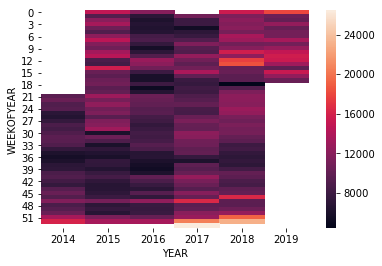

In [138]:
# Grouping by week and year

#aggregate by month
week_splash2 = meta_splash2.groupby(['WEEKOFYEAR', 'YEAR'])['SPOSTMIN'].mean().reset_index()

week_splash2 = week_splash2.pivot("WEEKOFYEAR", "YEAR", "SPOSTMIN")
ax = sns.heatmap(week_splash2)

#### Temp 

[Text(0, 0.5, 'Average Attendance by Minute'), Text(0.5, 0, 'Temperature')]

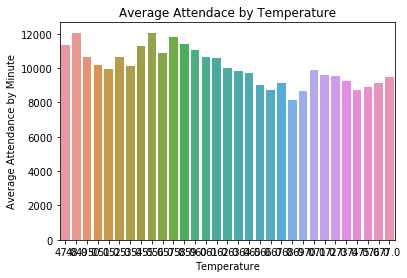

In [139]:
meta_splash2.WDWMINTEMP_mean = meta_splash2.WDWMINTEMP_mean.round()
avg_temp = meta_splash2.groupby("WDWMINTEMP_mean")["SPOSTMIN"].mean()
avg_temp = avg_temp.reset_index()
avg_temp = pd.DataFrame(avg_temp,columns=['WDWMINTEMP_mean','SPOSTMIN'])


ax = sns.barplot(x = "WDWMINTEMP_mean", y = "SPOSTMIN", data = avg_temp)
ax.set_title("Average Attendace by Temperature")
ax.set(xlabel='Temperature', ylabel='Average Attendance by Minute')

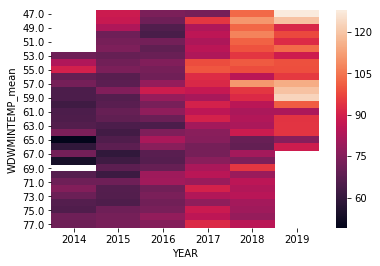

In [140]:
# Grouping by temperature and year

#aggregate by month
temp_splash2 = meta_splash2.groupby(['WDWMINTEMP_mean', 'YEAR'])['SPOSTMIN'].mean().reset_index()

temp_splash2 = temp_splash2.pivot("WDWMINTEMP_mean", "YEAR", "SPOSTMIN")
ax = sns.heatmap(temp_dwarf2)

#### Park HOur 

[Text(0, 0.5, 'Average Attendance by Minute'), Text(0.5, 0, 'Temperature')]

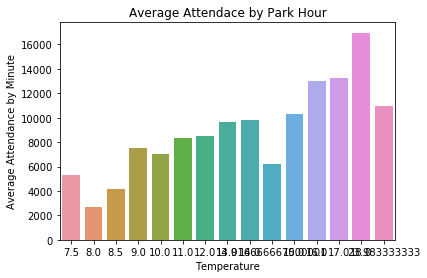

In [150]:
park_hour_df = meta_splash2[['SPOSTMIN','MKHOURS','MKOPEN','MKCLOSE','SEASON']]

park_hour_df = park_hour_df.groupby("MKHOURS")["SPOSTMIN"].mean()
park_hour_df = park_hour_df.reset_index()
park_hour_df.head(n=3)
#park_hour_df = pd.DataFrame(avg_temp,columns=['MKHOURS','SPOSTMIN','SEASON'])


ax = sns.barplot(x = "MKHOURS", y = "SPOSTMIN", data = park_hour_df)
ax.set_title("Average Attendace by Park Hour")
ax.set(xlabel='Temperature', ylabel='Average Attendance by Minute')

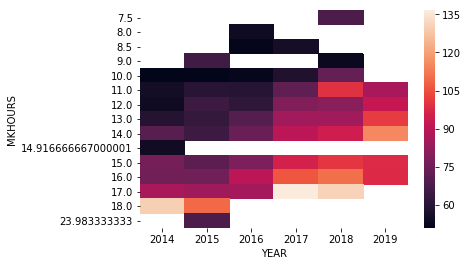

In [142]:
park_h_splash2 = meta_splash2.groupby(['MKHOURS', 'YEAR'])['SPOSTMIN'].mean().reset_index()

park_h_splash2 = park_h_splash2.pivot("MKHOURS", "YEAR", "SPOSTMIN")
ax = sns.heatmap(park_h_dwarf2)

# Pirates 

In [143]:
#Merging each ride with meta_data, using date as key
meta_pirates = pd.merge(pirates, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

ValueError: You are trying to merge on object and datetime64[ns] columns. If you wish to proceed you should use pd.concat

In [ ]:
#change NAs to 0 values
meta_pirates = meta_pirates.fillna(0)
#format date in a way that can be worked with
meta_pirates['date'] = pd.to_datetime(meta_pirates['date'])
meta_pirates.head()

In [ ]:
#avg of posted wait times by day in meta_splash
sum_by_day = meta_pirates.groupby('date')['SPOSTMIN'].mean()
#reset index to create dataframe columns
sum_by_day = sum_by_day.reset_index()
sum_by_day = pd.DataFrame(sum_by_day,columns=['date','SPOSTMIN'])
sum_by_day.head()

In [145]:
meta['DATE'] = pd.to_datetime(meta['DATE'])
#merge back with original meta set for daily weighted averages
meta_pirates2 = pd.merge(sum_by_day, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

# change month and day to names of month and day ie: 1 to Sunday, 1 to January
meta_pirates2['DAY'] = meta_pirates2['date'].dt.weekday_name
meta_pirates2['MONTH'] = meta_pirates2['date'].dt.month_name()

meta_pirates2.head()

,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN,DAY,MONTH
0,2014-05-28,11005.0,NaN,4,147,21,5,2014,SPRING,3,...,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN,Wednesday,May
1,2014-05-29,8290.0,NaN,5,148,21,5,2014,SPRING,4,...,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN,Thursday,May
2,2014-05-30,8930.0,NaN,6,149,21,5,2014,SPRING,5,...,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN,Friday,May
3,2014-05-31,10575.0,NaN,7,150,21,5,2014,SPRING,6,...,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN,Saturday,May
4,2014-06-01,12425.0,NaN,1,151,22,6,2014,SPRING,7,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,Sunday,June


In [ ]:
#fill na for new meta splash data
meta_pirates2 = meta_pirates2.fillna(0)
meta_pirates2.head(100)

#### Day of the Week 

[Text(0, 0.5, 'Average Attendance by Minute'),
 Text(0.5, 0, 'Week of the Year')]

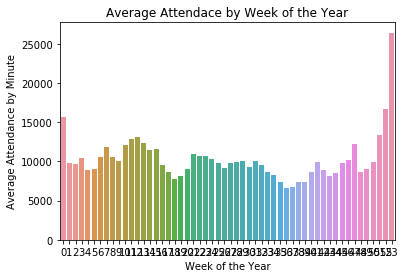

In [146]:
week_avg = meta_pirates2.groupby("WEEKOFYEAR")["SPOSTMIN"].mean()
week_avg = week_avg.reset_index()
week_avg = pd.DataFrame(week_avg,columns=['WEEKOFYEAR','SPOSTMIN'])
ax = sns.barplot(x = "WEEKOFYEAR", y = "SPOSTMIN", data = week_avg)
ax.set_title("Average Attendace by Week of the Year")
ax.set(xlabel='Week of the Year', ylabel='Average Attendance by Minute')

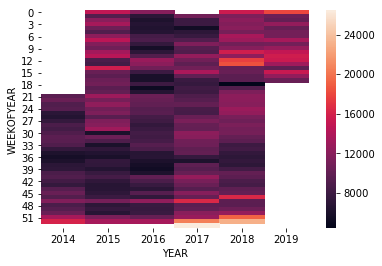

In [147]:
# Grouping by week and year

#aggregate by month
week_pirates2 = meta_pirates2.groupby(['WEEKOFYEAR', 'YEAR'])['SPOSTMIN'].mean().reset_index()

week_pirates2 = week_pirates2.pivot("WEEKOFYEAR", "YEAR", "SPOSTMIN")
ax = sns.heatmap(week_pirates2)

#### Temp 

[Text(0, 0.5, 'Average Attendance by Minute'), Text(0.5, 0, 'Temperature')]

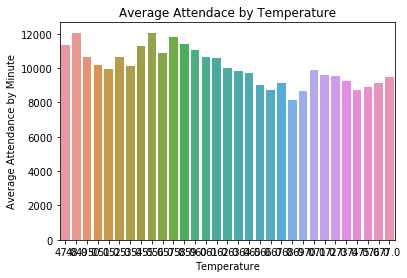

In [148]:
meta_pirates2.WDWMINTEMP_mean = meta_pirates2.WDWMINTEMP_mean.round()
avg_temp = meta_pirates2.groupby("WDWMINTEMP_mean")["SPOSTMIN"].mean()
avg_temp = avg_temp.reset_index()
avg_temp = pd.DataFrame(avg_temp,columns=['WDWMINTEMP_mean','SPOSTMIN'])


ax = sns.barplot(x = "WDWMINTEMP_mean", y = "SPOSTMIN", data = avg_temp)
ax.set_title("Average Attendace by Temperature")
ax.set(xlabel='Temperature', ylabel='Average Attendance by Minute')

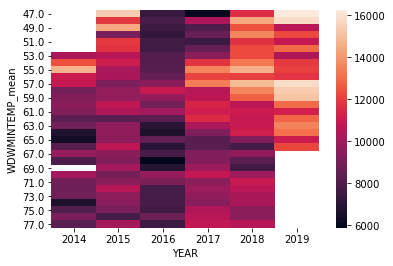

In [149]:
# Grouping by temperature and year

#aggregate by month
temp_pirates2 = meta_pirates2.groupby(['WDWMINTEMP_mean', 'YEAR'])['SPOSTMIN'].mean().reset_index()

temp_pirates2 = temp_pirates2.pivot("WDWMINTEMP_mean", "YEAR", "SPOSTMIN")
ax = sns.heatmap(temp_pirates2)

#### Park Hours

[Text(0, 0.5, 'Average Attendance by Minute'), Text(0.5, 0, 'Temperature')]

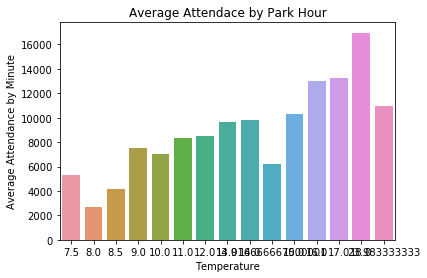

In [151]:
park_hour_df = meta_pirates2[['SPOSTMIN','MKHOURS','MKOPEN','MKCLOSE','SEASON']]

park_hour_df = park_hour_df.groupby("MKHOURS")["SPOSTMIN"].mean()
park_hour_df = park_hour_df.reset_index()
park_hour_df.head(n=3)
#park_hour_df = pd.DataFrame(avg_temp,columns=['MKHOURS','SPOSTMIN','SEASON'])


ax = sns.barplot(x = "MKHOURS", y = "SPOSTMIN", data = park_hour_df)
ax.set_title("Average Attendace by Park Hour")
ax.set(xlabel='Temperature', ylabel='Average Attendance by Minute')

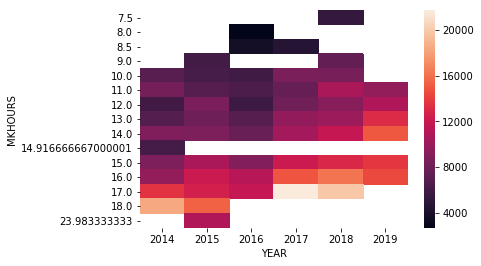

In [152]:
park_h_pirates2 = meta_pirates2.groupby(['MKHOURS', 'YEAR'])['SPOSTMIN'].mean().reset_index()

park_h_pirates2 = park_h_pirates2.pivot("MKHOURS", "YEAR", "SPOSTMIN")
ax = sns.heatmap(park_h_pirates2)